<a href="https://colab.research.google.com/github/RachelNderitu/Big-Data-Analytics/blob/main/Rachel_Text_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Import the dataset**

In [1]:
from google.colab import files

uploaded = files.upload()


Saving HateSpeechRaw.csv to HateSpeechRaw.csv


In [3]:
for name in uploaded.keys():
    print("Uploaded file name:", name)

Uploaded file name: HateSpeechRaw.csv


### **Load and Perform ODE**

Load the uploaded CSV file using pandas and preview the first few rows to understand its structure

In [9]:
data = pd.read_csv("HateSpeechRaw.csv", encoding='utf-8')
data = data.rename(columns={'tweet': 'original_text'})
data.dropna(subset=["original_text"], inplace=True)
data.drop_duplicates(subset="original_text", inplace=True)
data.head()

,original_text
0,";2017-10-18 11:04;0;0;""That #ShangweVedio shou..."
1,";2017-10-18 09:15;0;1;""they wrote letters to i..."
2,";2017-10-18 09:06;0;2;""Akombe was a nasa mole ..."
3,";2017-10-04 12:24;0;0;""@paulinenjoroge @OleItu..."
4,";2017-09-25 20:20;0;0;""#akombemustgo"";;;#akomb..."


Dataset shape: (139431, 2)
Missing values:
 original_text    0
text_length      0
dtype: int64
Duplicate tweets: 0


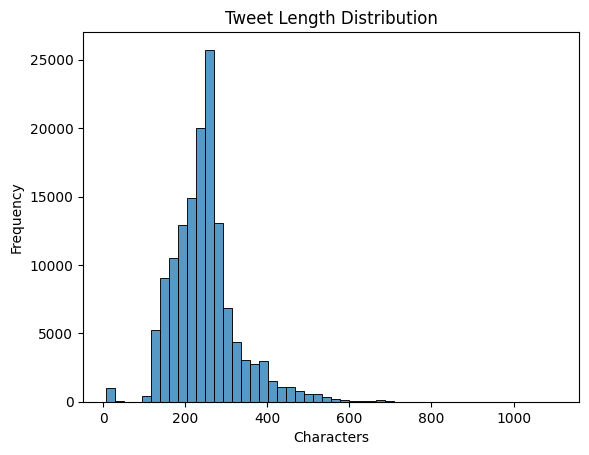

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

print("Dataset shape:", data.shape)
print("Missing values:\n", data.isnull().sum())
print("Duplicate tweets:", data.duplicated(subset='original_text').sum())

# Add tweet length column
data['text_length'] = data['original_text'].astype(str).apply(len)

# Plot length distribution
sns.histplot(data['text_length'], bins=50)
plt.title("Tweet Length Distribution")
plt.xlabel("Characters")
plt.ylabel("Frequency")
plt.show()

This output shows that:

* The dataset has 139,431 rows and 2 columns.
* There are no missing values in either column original_text and text_length.
* There are **no duplicate tweets** in the original_text column.

The histogram shows the frequency of tweets based on their character count.

Most tweets are between 150 and 300 characters long, with the peak around 260 characters.

Very few tweets are extremely short (less than 50 characters) or very long (over 600 characters).

The distribution is right-skewed, meaning the majority of tweets are relatively short, but a few much longer tweets stretch the tail.




The data has 3 sections:

1 - date

2 - label

3 - tweet


In [5]:
# Read the file as raw text to split and restructure manually
with open("HateSpeechRaw.csv", 'r', encoding='utf-8') as f:
    lines = f.readlines()

# Parse each line into structured format
parsed_data = []
for line in lines[1:]:  # skip the first line if it's a header
    parts = line.strip().split(';')
    if len(parts) >= 5:
        date = parts[1]
        label = parts[2]
        tweet = ';'.join(parts[4:])  # combine all fields after the 4th as the tweet
        parsed_data.append([date, label, tweet])

# Create a new DataFrame with named columns
df_cleaned = pd.DataFrame(parsed_data, columns=["date", "label", "tweet"])

# Preview the cleaned structure
df_cleaned.head()

,date,label,tweet
0,2017-10-18 11:04,0,"""""That #ShangweVedio should be replaced. Where..."
1,2017-10-18 09:15,0,"""""they wrote letters to iebc their bloggers tr..."
2,2017-10-18 09:06,0,"""""Akombe was a nasa mole Jubilee never wante..."
3,2017-10-04 12:24,0,"""""@paulinenjoroge @OleItumbi @JubileePartyK @T..."
4,2017-09-25 20:20,0,"""""#akombemustgo"""";;;#akombemustgo;""""9123662401..."


### **Preprocess Tweets Using NLTK**


In [6]:
#install nltk and dependencies
import nltk

# Download essential NLTK tools
nltk.download('punkt')      # For tokenizing text into words
nltk.download('stopwords')  # Common words like "the", "is", "and"
nltk.download('wordnet')    # For lemmatization (getting root word)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

### **Cleaning the text**

	1.	URLs (e.g. https://...)
	2.	HTML tags (e.g. <div>)
	3.	Special characters (e.g. @, #, emojis)
	4.	Extra whitespace
	5.	Lowercase everything

In [13]:
import re

# Define a function to clean raw tweet text
def clean_text(text):
    text = re.sub(r"http\S+|www\S+|pic\.twitter\S+", "", text)  # remove URLs
    text = re.sub(r"<.*?>", "", text)  # remove HTML tags
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # remove special characters and digits
    text = re.sub(r"\s+", " ", text).strip()  # remove extra spaces
    return text.lower()  # convert to lowercase

# Apply the function to the tweet column
df_cleaned["clean_text"] = df_cleaned["tweet"].apply(clean_text)

# Preview cleaned text
df_cleaned[["tweet", "clean_text"]].head()

,tweet,clean_text
0,"""""That #ShangweVedio should be replaced. Where...",that shangwevedio should be replaced where did...
1,"""""they wrote letters to iebc their bloggers tr...",they wrote letters to iebc their bloggers tren...
2,"""""Akombe was a nasa mole Jubilee never wante...",akombe was a nasa mole jubilee never wanted hi...
3,"""""@paulinenjoroge @OleItumbi @JubileePartyK @T...",paulinenjoroge oleitumbi jubileepartyk teamuhu...
4,"""""#akombemustgo"""";;;#akombemustgo;""""9123662401...",akombemustgoakombemustgo


### **Removing stop words**

In [14]:
from nltk.corpus import stopwords

# Download stopwords if not already done
import nltk
nltk.download('stopwords')

# View English stopwords
stop_words = set(stopwords.words('english'))
print(sorted(list(stop_words))[:20])  # show first 20

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Split each cleaned tweet into words

Remove all words that appear in NLTK’s English stopword list

Save the result in a new column: no_stopwords

In [15]:
from nltk.corpus import stopwords

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from each cleaned tweet
df_cleaned["no_stopwords"] = df_cleaned["clean_text"].apply(
    lambda x: [word for word in x.split() if word not in stop_words]
)

# Preview the result
df_cleaned[["clean_text", "no_stopwords"]].head()

,clean_text,no_stopwords
0,that shangwevedio should be replaced where did...,"[shangwevedio, replaced, akombemustgo, disappe..."
1,they wrote letters to iebc their bloggers tren...,"[wrote, letters, iebc, bloggers, trended, akom..."
2,akombe was a nasa mole jubilee never wanted hi...,"[akombe, nasa, mole, jubilee, never, wanted, s..."
3,paulinenjoroge oleitumbi jubileepartyk teamuhu...,"[paulinenjoroge, oleitumbi, jubileepartyk, tea..."
4,akombemustgoakombemustgo,[akombemustgoakombemustgo]


### **Applying porter stemmer**

In [16]:
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

# Apply stemming to stopword-free words
df_cleaned["stemmed"] = df_cleaned["no_stopwords"].apply(
    lambda words: [stemmer.stem(word) for word in words]
)

# Preview the stemmed results
df_cleaned[["no_stopwords", "stemmed"]].head()

,no_stopwords,stemmed
0,"[shangwevedio, replaced, akombemustgo, disappe...","[shangwevedio, replac, akombemustgo, disappear..."
1,"[wrote, letters, iebc, bloggers, trended, akom...","[wrote, letter, iebc, blogger, trend, akombemu..."
2,"[akombe, nasa, mole, jubilee, never, wanted, s...","[akomb, nasa, mole, jubile, never, want, septe..."
3,"[paulinenjoroge, oleitumbi, jubileepartyk, tea...","[paulinenjorog, oleitumbi, jubileepartyk, team..."
4,[akombemustgoakombemustgo],[akombemustgoakombemustgo]


### **Applying lemmatization on the no_stopwords column on the first 1000 rows**

In [17]:
from nltk.stem import WordNetLemmatizer

# Re-initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization only on the first 1000 rows
df_cleaned.loc[:999, "lemmatized"] = df_cleaned.loc[:999, "no_stopwords"].apply(
    lambda words: [lemmatizer.lemmatize(word) for word in words]
)

# Preview results
df_cleaned[["no_stopwords", "lemmatized"]].head()

,no_stopwords,lemmatized
0,"[shangwevedio, replaced, akombemustgo, disappe...","[shangwevedio, replaced, akombemustgo, disappe..."
1,"[wrote, letters, iebc, bloggers, trended, akom...","[wrote, letter, iebc, blogger, trended, akombe..."
2,"[akombe, nasa, mole, jubilee, never, wanted, s...","[akombe, nasa, mole, jubilee, never, wanted, s..."
3,"[paulinenjoroge, oleitumbi, jubileepartyk, tea...","[paulinenjoroge, oleitumbi, jubileepartyk, tea..."
4,[akombemustgoakombemustgo],[akombemustgoakombemustgo]


### **Tokenization**

In [19]:
from nltk.tokenize import word_tokenize

# Apply tokenization to the clean text
df_cleaned["tokens"] = df_cleaned["clean_text"].apply(word_tokenize)

# Preview tokens
df_cleaned[["clean_text", "tokens"]].head()

,clean_text,tokens
0,that shangwevedio should be replaced where did...,"[that, shangwevedio, should, be, replaced, whe..."
1,they wrote letters to iebc their bloggers tren...,"[they, wrote, letters, to, iebc, their, blogge..."
2,akombe was a nasa mole jubilee never wanted hi...,"[akombe, was, a, nasa, mole, jubilee, never, w..."
3,paulinenjoroge oleitumbi jubileepartyk teamuhu...,"[paulinenjoroge, oleitumbi, jubileepartyk, tea..."
4,akombemustgoakombemustgo,[akombemustgoakombemustgo]


### **Displaying a sample dataset after preprocessing**

In [20]:
# Show only the key columns of the final dataset
df_cleaned[["tweet", "clean_text", "tokens", "no_stopwords", "stemmed", "lemmatized"]].head()

,tweet,clean_text,tokens,no_stopwords,stemmed,lemmatized
0,"""""That #ShangweVedio should be replaced. Where...",that shangwevedio should be replaced where did...,"[that, shangwevedio, should, be, replaced, whe...","[shangwevedio, replaced, akombemustgo, disappe...","[shangwevedio, replac, akombemustgo, disappear...","[shangwevedio, replaced, akombemustgo, disappe..."
1,"""""they wrote letters to iebc their bloggers tr...",they wrote letters to iebc their bloggers tren...,"[they, wrote, letters, to, iebc, their, blogge...","[wrote, letters, iebc, bloggers, trended, akom...","[wrote, letter, iebc, blogger, trend, akombemu...","[wrote, letter, iebc, blogger, trended, akombe..."
2,"""""Akombe was a nasa mole Jubilee never wante...",akombe was a nasa mole jubilee never wanted hi...,"[akombe, was, a, nasa, mole, jubilee, never, w...","[akombe, nasa, mole, jubilee, never, wanted, s...","[akomb, nasa, mole, jubile, never, want, septe...","[akombe, nasa, mole, jubilee, never, wanted, s..."
3,"""""@paulinenjoroge @OleItumbi @JubileePartyK @T...",paulinenjoroge oleitumbi jubileepartyk teamuhu...,"[paulinenjoroge, oleitumbi, jubileepartyk, tea...","[paulinenjoroge, oleitumbi, jubileepartyk, tea...","[paulinenjorog, oleitumbi, jubileepartyk, team...","[paulinenjoroge, oleitumbi, jubileepartyk, tea..."
4,"""""#akombemustgo"""";;;#akombemustgo;""""9123662401...",akombemustgoakombemustgo,[akombemustgoakombemustgo],[akombemustgoakombemustgo],[akombemustgoakombemustgo],[akombemustgoakombemustgo]


A comprehensive text preprocessing workflow on a hate speech dataset using Python and NLTK has been successfully achieved.

 We started by parsing raw tweets, we cleaned the text by removing URLs, HTML tags, special characters, and extra spaces.

 We then normalized the text to lowercase, removed stopwords, and applied both stemming and lemmatization (limited to the first 1000 rows for performance). Tokenization was successfully implemented using NLTK’s word_tokenize, and all transformations were stored in new columns for easy comparison.

 The final dataset is now well-prepared for further analysis or machine learning applications.
